In [20]:
import os
from collections import defaultdict
import numpy as np
# Define the directories and platforms
cpu_platforms = ["Pennylane", "Qiskit", "ProjectQ", "Qsun"]
hardware_platforms = ["FP32", "FX24", "FX32"]
num_gates = range(1, 401) 
colors = {
    'FX32': 'purple',
    'Qiskit': 'indigo',
    
}

orders = []
for i in range(10):
    file = np.loadtxt(f"../order/order/order_qubit{i}_10qubits.txt")
    orders.append(file)
orders = np.array(orders)
orders = np.max(orders, axis=0)

time_qiskit = np.loadtxt("../time/order/order_qiskit_cad114_10qubit.txt")

In [24]:
time_qiskit[-1]

0.021198718547821044

Text(0.5, 0, '#Gates')

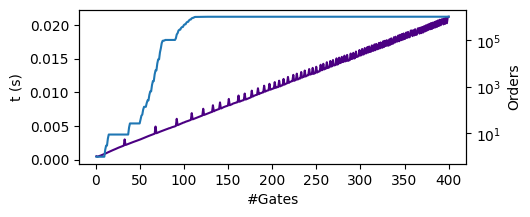

In [23]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(5, 2))
axs.plot(num_gates, time_qiskit, color=colors['Qiskit'])
ax2 = axs.twinx()
ax2.plot(num_gates, orders)
axs.set_ylabel('t (s)')
ax2.set_ylabel('Orders')
ax2.set_yscale('log')
axs.set_xticks(range(0, 401, 50))
axs.set_xticklabels(range(0, 401, 50))
axs.set_xlabel("#Gates")

In [ ]:
# Create a twin y-axis
ax2 = axs.twinx()

# Plot data on the twin y-axis
ax2.plot(num_gates, orders, color='red')

# Set labels for the twin y-axis

ax2.tick_params(axis='y', labelcolor='red')